In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

2024-10-28 21:44:12.642107: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-28 21:44:17.480304: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-28 21:44:17.488287: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-28 21:44:18.226667: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-28 21:44:19.644184: I tensorflow/core/platform/cpu_feature_guar

In [2]:
base_dir = "subset"
train_dir = os.path.join(base_dir, "train")
train_cats_dir = os.path.join(base_dir, "train", "cats")
train_dogs_dir = os.path.join(base_dir, "train", "dogs")
validation_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")

In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [4]:
from keras import optimizers

model.compile(
    loss="binary_crossentropy",
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=["acc"],
)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    # This is the target directory
    train_dir,
    # All images will be resized to 150x150
    target_size=(150, 150),
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode="binary",
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=20, class_mode="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
for data_batch, labels_batch in train_generator:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=3,
    validation_data=validation_generator,
    validation_steps=50,
)

Epoch 1/3
100/100 [==============================] - 32s 299ms/step - loss: 0.6913 - acc: 0.5215 - val_loss: 0.6815 - val_acc: 0.5290
Epoch 2/3
100/100 [==============================] - 29s 287ms/step - loss: 0.6759 - acc: 0.5730 - val_loss: 0.6616 - val_acc: 0.5830
Epoch 3/3
100/100 [==============================] - 30s 297ms/step - loss: 0.6546 - acc: 0.6095 - val_loss: 0.6527 - val_acc: 0.5940


In [8]:
model.save("cats_and_dogs_small_1.h5")

/workspaces/eng-ai-agents/.venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.models as models

import captum
from captum.attr import IntegratedGradients, Occlusion, LayerGradCam, LayerAttribution
from captum.attr import visualization as viz

import os, sys
import json

import numpy as np
from PIL import Image


KeyboardInterrupt



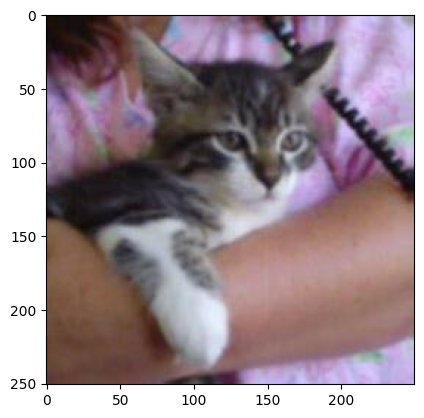

In [92]:
test_img = Image.open("subset/train/cats/cat.168.jpg")
test_img_data = np.asarray(test_img)
plt.imshow(test_img_data)
plt.show()

In [177]:
transform = transforms.Compose(
    [transforms.Resize(150), transforms.CenterCrop(150), transforms.ToTensor()]
)
img = transform(test_img)
baseline = torch.zeros(3,150,150)
# print(img.size())
baseline

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [166]:
datagen = ImageDataGenerator(rescale=1.0 / 255)

gen = datagen.flow_from_directory(
    # This is the target directory
    "single",
    # All images will be resized to 150x150
    target_size=(150, 150),
    batch_size=1,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode="binary",
)

for data_batch, labels_batch in gen:
    data = data_batch
    break

cat = Image.open("single/cat/cat.10.jpg")
dog = Image.open("single/dog/dog.0.jpg")

t = transforms.ToTensor()
cat = t(cat)
datatens = torch.Tensor(data[0])
# print(data[0])
# print(cat)

Found 2 images belonging to 2 classes.
